# Comment choisir une représentation de graphe ?
Lorsqu'on essaye de programmer un algorithme utilisant des graphes un question se pose très vite : comment représenter les graphes ? Plusieurs solutions existent et chacune d'entre elles a ses forces et ses faiblesse. Dans ce notebook, nous allons voir les principales représentations qui existent et discuter de leurs forces et faiblesses via deux algorithmes.

## Algorithmes de test
Pour pouvoir utiliser nos algorithmes avec différentes représentation, on va utiliser des classes qui vont permettre de laisser le graphe donner lui même les informations et pouvoir utiliser n'importe quelle représentation dans nos fonctions.

Pour que cette astuce fonctionne, il faut imposer certaines conditions à nos classes : les noeuds seront toujours représentés par un nombre et les arêtes par un triplet (i,j,w) où i et j sont les noeuds liés et w est le poids de l'arête.
### Algorithme de Bellman-Ford
Le premier de nos algorithmes de test est Bellman-Ford. Tout comme l'algorithme de Dijkstra, il permet de trouver le plus court chemin entre un noeud et les autres en acceptant toutefois les arêtes de poids négatif. Son fonctionnement n'est pas intéressant ici, l'important est de remarquer que la fonction _graph.get_edges_ est appelée très souvent.

In [5]:
import time

def bellmanFord(graph,source):
    d = []
    paths = []
    for node in graph.get_nodes():
        d.append(float('inf'))
        paths.append(None)
    d[source] = 0
    for k in range(graph.get_size() - 1):
        for edge in graph.get_edges(): # Cette fonction est très souvent appelée, faire en sorte qu'elle soit rapide pourrait être intéressant.
            u,v,w = edge
            if(d[u] + w < d[v]):
                d[v] = d[u] + w
                paths[v] = u
            if(d[v] + w < d[u]):
                d[u] = d[v] + w
                paths[u] = v
    return d,paths



### Algorithme DFS
Second algorithme qu'on va utiliser pour comparer nos représentation, l'algorithme DFS (Depth-First Search ou Recherche en profondeur) est un algorithme qui permet de découvrir un graphe (ce qui est intéressant dans le domaine de l'intelligence artificielle cf LINFO1361) et ses propriétés sont utilisées dans d'autres algorithmes (comme la détection de composantes fortement connexes).
DFS utilise souvent une autre fonction : _graph.get_neighbors_.

In [6]:
from collections import deque as deque

def DFS(graph, source):
    discovered = [False]*graph.get_size()
    paths = [-1]*graph.get_size()
    to_visit = deque()
    to_visit.append(source)
    while len(to_visit) != 0:
        v = to_visit.pop()
        if(discovered[v] == False):
            discovered[v] = True
            for n,w in graph.get_neighbors(v):
                paths[n] = v
                to_visit.append(n)
    return paths
    

## Représentation de graphes
Cette seconde partie explique 4 manières de stocker un graphe et donner une implémentation basique de celles-ci.
Chaque implémentation permet de créer un graphe, ajouter des arêtes, récupérer la liste des noeuds et récupérer la liste des arêtes. On parlera également de la complexité de chacune de ces tâches.

### La Matrice d'Adjacence
Pour représenter un graphe sous forme de matrice d'adjacence, on prend une matrice carrée de $N\times N$ éléments ($N$ étant le nombre de noeuds) et l'entrée $a_{ij}$ de la matrice donne le poids de l'arête entre les noeuds $i$ et $j$. Le graphe exemple devient donc:
$$\begin{pmatrix} 0 & 1 & 0 & 3 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 2 \\ 3 & 0 & 2 & 0 \end{pmatrix}
$$
Dans l'implémentation ci-dessous, on peut voir que la liste des noeuds peut-être donnée en $\mathcal{O}(1)$ tout comme l'ajout d'une arête. Cepandant récupérer la liste des arêtes demande $\mathcal{O}(N^2)$ instructions et la liste des voisins $\mathcal{O}(N)$.

In [7]:
class GraphAM:

    def __init__(self,nodes,edges):
        self.max_nodes = nodes
        self.adjency = []
        for i in range(nodes):
            self.adjency.append([0]*nodes)

    def add_edge(self,i,j,v):
        if(i < self.max_nodes+1 and j < self.max_nodes+1):
            self.adjency[i][j] = v
            self.adjency[j][i] = v

    def get_neighbors(self,n):
        neighbors = []
        for node,dist in enumerate(self.adjency[n]):
            if dist != 0:
                neighbors.append((node,dist))
        return neighbors
            

    def get_size(self):
        # Returns the number of nodes contained in the graph.
        return self.max_nodes
        
    def get_nodes(self):
        # Returns the list of all nodes.
        return range(self.max_nodes)

    def get_edges(self):
        l = []
        for i in range(self.max_nodes):
            for j in range(i+1):
                if self.adjency[i][j] != 0:
                    l.append((i,j,self.adjency[i][j]))
        return l

### La Liste d'Adjacence
La matrice d'adjacence présente un problème majeur : l'occupation de la mémoire. Dans notre exemple, on peut voir que pour stocker un petit graphe de 4 noeud et 4 arêtes, il nous faut stocker 16 valeurs (ce qui fait environ 512bits) et ce nombre va grandir proportionnellement au carré du nombre de noeud (un graphe de 10.000 noeuds et 50.000 arêtes va demander environ 50Gb de stockage).
La liste d'adjacence réduit la consommation de mémoire en conservant notre graphe dans une liste $l$ où chaque élément $l[i]$ est une liste des noeuds adjacents à $i$. Avec une liste, notre graphe ne pèse plus que $4*64+32*4 = 384$ bits et le graphe de 50Gb ne pèsera que 2Mb.

En ce qui concerne la complexité, on est également meilleurs : ajouter une arête et récupérer la liste des noeuds se fait toujours en $\mathcal{O}(1)$ tout comme récupérer les voisins d'un noeud donné mais lister toutes les arêtes demande $\mathcal{O}(N+E)$ instructions maintenant.


In [8]:
class GraphAL:
    def __init__(self,nodes,edges):
        self.max_nodes = nodes
        self.adjency = []
        for _ in range(nodes):
            self.adjency.append([])

    def add_edge(self,i,j,v):
        if(i < self.max_nodes+1 and j < self.max_nodes+1):
            self.adjency[i].append((j,v))
            self.adjency[j].append((i,v))

    def get_neighbors(self,n):
        return self.adjency[n]

    def get_size(self):
        # Returns the number of nodes contained in the graph.
        return self.max_nodes
        
    def get_nodes(self):
        # Returns the list of all nodes.
        return range(self.max_nodes)

    def get_edges(self):
        l = []
        for i in range(self.max_nodes):
            for edge in self.adjency[i]:
                if(i<=edge[0]):
                    l.append((edge[0],i,edge[1]))
        return l

### La Matrice d'Incidence
Et si au lieu de stocker les informations du point de vue des noeuds, on la stockait du point de vue des arêtes ? Prenons une matrice rectangulaire où chaque ligne indique quel noeuds l'arête représentée relie.

In [9]:
class GraphIM:
    
    def __init__(self, nodes, edges):
        self.max_nodes = nodes
        self.max_edges = edges
        self.current_edge = 0
        self.matrix = []
        for _ in range(edges):
            self.matrix.append([0]*nodes)

    def add_edge(self,i,j,v):
        if(i < self.max_nodes + 1 and j < self.max_nodes + 1):
            self.matrix[self.current_edge][i] = v
            self.matrix[self.current_edge][j] = v
            self.current_edge += 1

    def get_neighbors(self,n):
        neighbors = []
        for edge in self.matrix: #Pour chaque arête,
            if edge[n] != 0: #On regarde si l'arête est incidente à n, on regarde quel autre noeud était incident.
                neighbor = 0
                for i in range(len(edge)):
                    if edge[i] != 0 and i != 0: #On trouve le noeud qui n'est pas n et qui est incident
                        neighbors.append((i,edge[i])) #On l'ajoute au voisins
        return neighbors


    def get_size(self):
        return self.max_nodes
        
    def get_nodes(self):
        return range(self.max_nodes)

    def get_edges(self):
        edges = []
        for edge in self.matrix: #Pour chaque arête/colonne de la matrice,
            new_edge = [0,0,0]
            for node,weight in enumerate(edge): # On observe quel sont les deux noeuds reliés et le poids de l'arête
                if node != 0: # Noeud 1 trouvé
                    if(new_edge[2] == 0):
                        new_edge[0] = node
                        new_edge[2] = weight
                    else: # Noeud 2 trouvé, on ajoute l'arête complète à la liste
                        new_edge[1] = node
                        edges.append(new_edge)
                        break
        return edges

### La Liste d'Incidence

Tout comme la matrice d'adjacence, la matrice d'incidence demande beaucoup de mémoire pour être stockée. Une version compactée de la matrice d'incidence est la liste d'incidence : on va conserver l'ensemble des arêtes dans une liste où chaque élément $i$ donne les noeuds incident à $e_i$ et son poids.

Pour les performances, donner la liste des arêtes devient extrêment rapide puiqu'il s'agit de notre représentation. Retrouver la liste des noeuds reste peu cher car on peut stocker le nombre maximum et regénerer la liste à partir de cette valeur (au lieu de parcourir toutes les arêtes pour lister les noeuds). Cependant, trouver la liste des voisins d'un noeud donné demande de jeter un oeil à chaque arête du graphe pour vérifier si $n$ est incident à l'arête ce qui donne une complexité de $\mathcal{O}(E)$. Pour finir, ajouter une arête possède également un coût négligeable ($\mathcal{O}(1)$ en amorti)


In [10]:
class GraphIL:
    
    def __init__(self, nodes,edges):
        self.max_nodes = nodes
        self.edges = []

    def add_edge(self,i,j,v):
        if(i < self.max_nodes + 1 and j < self.max_nodes + 1):
            self.edges.append((i,j,v))

    def get_neighbors(self,n):
        neighbors = []
        for edge in self.edges:
            if edge[0] == n:
                neighbors.append((edge[1],edge[2]))
            elif edge[1] == n:
                neighbors.append((edge[0],edge[2]))
        return neighbors
    
    def get_size(self):
        return self.max_nodes
        
    def get_nodes(self):
        return range(self.max_nodes)

    def get_edges(self):
        return self.edges

## Resultats
Le code ci-dessous génère des graphes aléatoires et analyse la complexité temporelle de chacun selon le nombre d'arête et de noeuds (Comme nos exemples servent d'illustration, on va se contenter de garder N et E proportionnels). 

In [20]:
import random as R

def genGraph(implementation,sizeNode,sizeEdge):
    G = implementation(sizeNode,sizeEdge)
    for e in range(sizeEdge):
        G.add_edge(R.randint(0,sizeNode-1),R.randint(0,sizeNode-1),R.randint(-1,10))
    return G

def testPerformances(graph_representation):
    G = genGraph(implementation)
    tic = time.time()
    print(bellmanFord(G,0))
    tac = time.time()
    print("Elapsed time :",tac-tic)

def compareImplementations(implementation_list):
    for impl in implementation_list:
        times = []
        for _ in range(10): #Test sur 10 instances aléatoires
            G = genGraph(impl,200,800)
            tic = time.time()
            bellmanFord(G,0)
            tac = time.time()
            times.append(tac-tic)
        print(str(impl)[17:24],sum(times)/len(times))

print("Temps de calcul de l'algorithme Bellman-Ford pour un graphe aléatoire:")
compareImplementations([GraphAM,GraphAL,GraphIM,GraphIL])


Temps de calcul de l'algorithme Bellman-Ford pour un graphe aléatoire
GraphAM 0.2756101131439209
GraphAL 0.06792216300964356
GraphIM 1.3848485231399537
GraphIL 0.03216209411621094


Quand on observe les temps que mettent chacun des algorithmes, on remarque que la matrice d'incidence à beaucoup de mal ; elle met plus d'une seconde à exécuter l'algorithme où la liste d'indicence ne met qu'un trentième de seconde ! Cette différence s'explique par la double boucle dans la méthode _GraphAL.get_edges_ mais même avec une meilleure méthode, chacune des 3 représentations doit effectuer un travail qui est trivial pour _GraphIL_.

En théorie de la complexité, savoir qu'un algorithme mais $t$ secondes pour s'exécuter avec une entrée de taille $n$ n'est pas assez. Ce qui nous intéresse réellement, c'est de savoir comment le temps d'exécution $t$ évolue avec avec $n$. Pour observer cette évolution, on va noter le temps d'exécution pour $n$, $2n$, $3n$,... et les comparer sur un joli graphe.

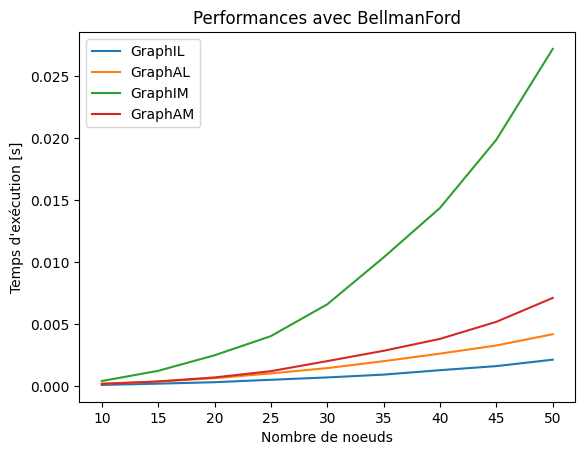

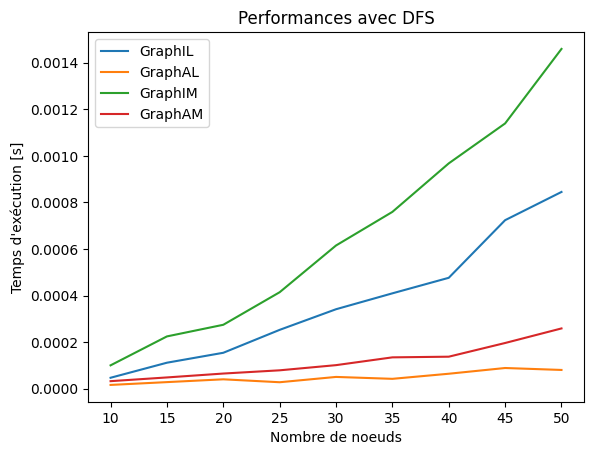

In [22]:
import matplotlib.pyplot as plt

def getTimes(impl,N,algo):
    T = []
    for n in N:
        times = []
        for _ in range(250): #Test sur 250 instances aléatoires
            G = genGraph(impl,n,4*n)
            tic = time.time()
            algo(G,0)
            tac = time.time()
            times.append(tac-tic)
        T.append(sum(times)/len(times))
    return T

N = [10,15,20,25,30,35,40,45,50]
# Création du premier graphe
plt.figure()
plt.title("Performances avec BellmanFord")
plt.xlabel("Nombre de noeuds")
plt.ylabel("Temps d'exécution [s]")
plt.plot(N,getTimes(GraphIL,N,bellmanFord),label="GraphIL")
plt.plot(N,getTimes(GraphAL,N,bellmanFord),label="GraphAL")
plt.plot(N,getTimes(GraphIM,N,bellmanFord),label="GraphIM")
plt.plot(N,getTimes(GraphAM,N,bellmanFord),label="GraphAM")
plt.legend()

# Création du second graphe
plt.figure()
plt.title("Performances avec DFS")
plt.xlabel("Nombre de noeuds")
plt.ylabel("Temps d'exécution [s]")
plt.plot(N,getTimes(GraphIL,N,DFS),label="GraphIL")
plt.plot(N,getTimes(GraphAL,N,DFS),label="GraphAL")
plt.plot(N,getTimes(GraphIM,N,DFS),label="GraphIM")
plt.plot(N,getTimes(GraphAM,N,DFS),label="GraphAM")
plt.legend()
plt.show()

NB : N'hésite pas à jouer avec la génération du graphe pour isoler des informations intéressantes.

Sur le graphe généré ci-dessus, on peut voir que dans les deux cas GraphIM prend un temps de plus en plus long, bien plus que les 3 autres algorithmes, pour trouver une solution.
Lorsqu'on zoome sur les trois algorithmes "compétitifs", on observe que la tendance dépend de la représentation : GraphAL est meilleur pour DFS mais GraphIL est meilleur pour BellmanFord. On peut expliquer ces différences via la complexité des méthodes les plus appelées dans ces deux algorithmes (get_neighbors pour DFS et get_edges pour BellmanFord) dont les temps de calculs sont amplifiés par les boucles.

## Conclusion
À travers ce notebook, nous avons pu voir 4 implémentation d'un graphe (ce sont les 4 principales mais il en existe d'autres) et remarquer que selon le contexte, une représentation sera plus efficace qu'une autre. Avec nos deux algorithmes, nous avons pu observer l'efficacité des formes AL et IL mais il est possible de trouver des cas de figures où les formes AM et IM seront meilleures (cf chapitre sur l'algèbre des graphes). En théorie des graphes comme dans d'autres domaines, comprendre les forces et les faiblesses des différentes implémentations possibles est extrêmement important pour obtenir un code optimisé.